In [27]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Let's take a first look at the data

In [28]:
# Loading a csv file with pandas
train_data = pd.read_csv('../data/train.csv')

In [29]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Dictionary
VariableDefinitionKey 
- survival Survival 0 = No, 1 = Yes 
- pclass Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd 
- sex Sex Age Age in years 
- sibsp # of siblings / spouses aboard the Titanic 
- parch # of parents / children aboard the Titanic 
- ticket Ticket number 
- fare Passenger fare 
- cabin Cabin number 
- embarked Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

### Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

### Notes 

The survived column is what we want to predict, we want to predict if someone survived titanic or not.

The other columns (except for the index and the PassengerId) can be used to predict wether or not a passenger has survived.

A line of thought might be: 

- Maybe more females have survived titanic?
- Maybe younger passengers are more likely to survive titanic?
- Maybe more people of a certain Pclass have survived titanic?


# Data Exploration, why bother?

Why bother about data exploration, can't we just throw all data into an AI algorithm and get going?

We all wish it was that easy, however in reality you do need a clear understanding of the data to create great machine learning.

Also, we need to know which columns should be numeric and which columns might have to be processed before we can use it in a machine learning algorithm.

It's also very good which features correlate with the target variable

In [30]:
train_data.isnull().sum() #checking for total null values, eg. missing data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Let's take a look at the distribution of the target (survived)

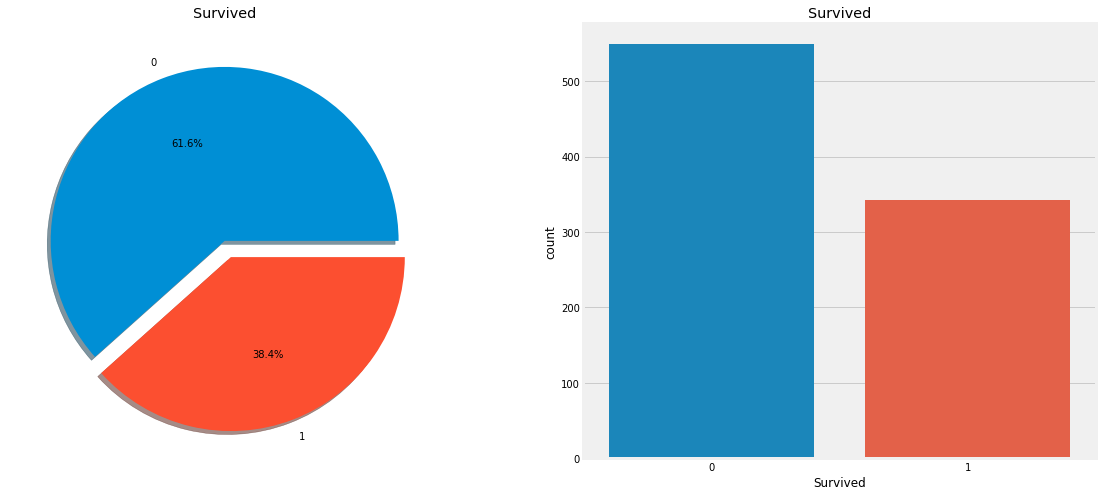

In [31]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train_data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train_data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

We can see that 38.4 % of the passengers in the training data have survived

# Let's analyze some features

## Sex

In [32]:
train_data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

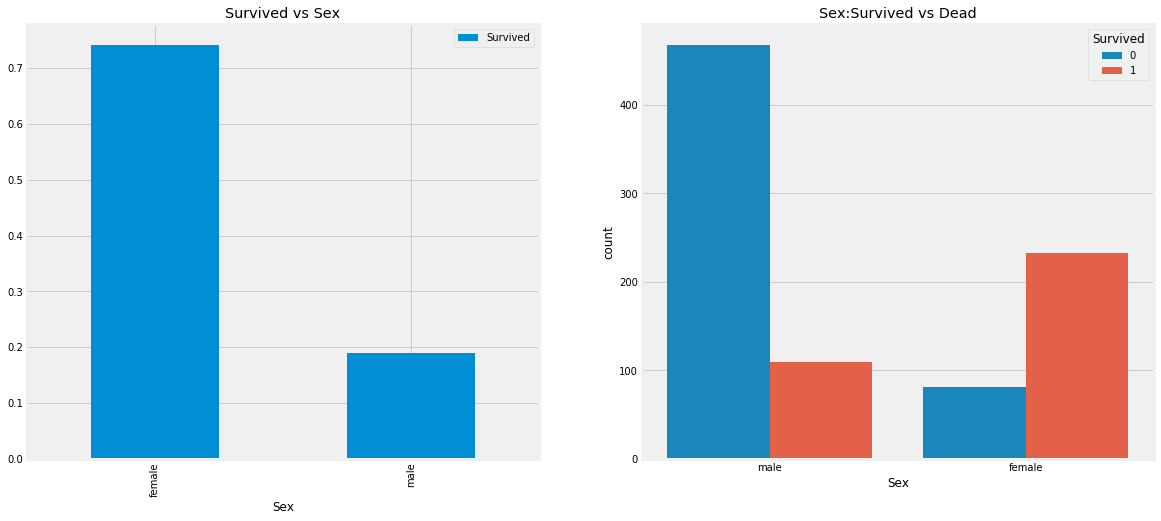

In [33]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train_data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=train_data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

Looks like a lot more females have survived then males, this is an interesting observation when we want to apply machine learning

## Pclass

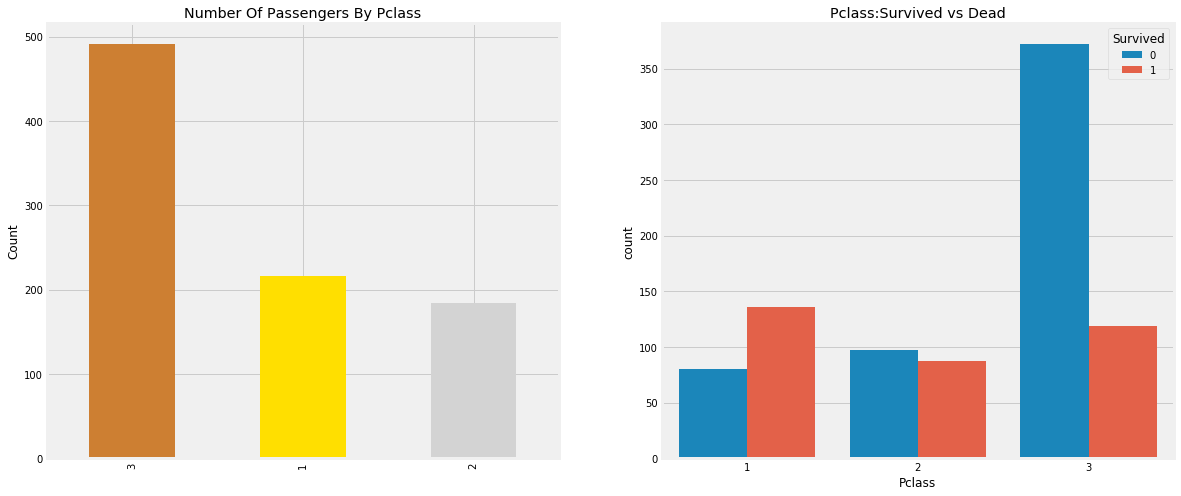

In [34]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train_data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=train_data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

We can see that there are many more passengers in third class versus first or second class. However first class has the lowest casualty rate.

# Your turn!

We have given a couple of examples of how to explore data using pandas and seaborn (the plot library). 

Try to find more ways of understanding the data!

Some questions we might want to find out:

- How does age affect the survival rate?
- How does the fare price affect survival rate?
- Does it matter where people embarked?
- Does it matter how many family members one had on board?
- Can we learn anything from the name, cabin and ticketnumber?

# Age

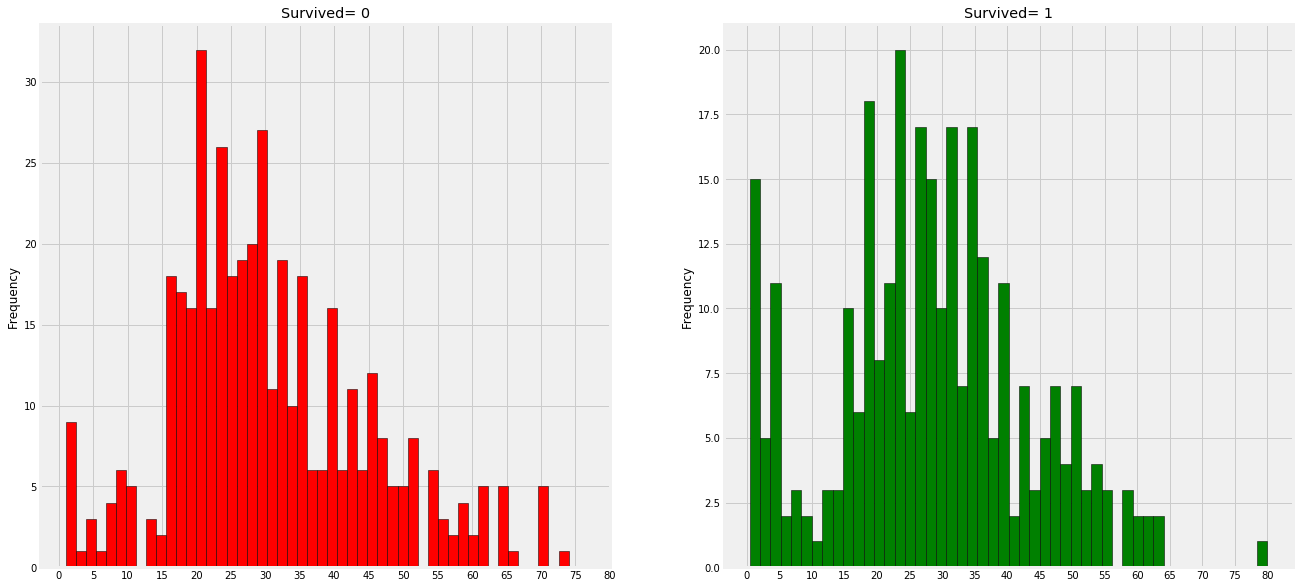

In [35]:
f,ax=plt.subplots(1,2,figsize=(20,10))
train_data[train_data['Survived']==0].Age.plot.hist(ax=ax[0],bins=50,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train_data[train_data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=50,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

Observations:

1)The Toddlers(age<5) were saved in large numbers(The Women and Child First Policy).

2)The oldest Passenger was saved(80 years).

3)Maximum number of deaths were in the age group of 30-40.


# Embarked

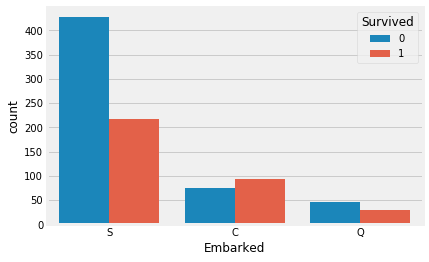

In [36]:
sns.countplot('Embarked',hue='Survived',data=train_data)

# SibSp

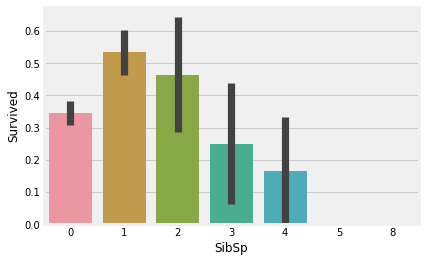

In [37]:
sns.barplot('SibSp','Survived',data=train_data)

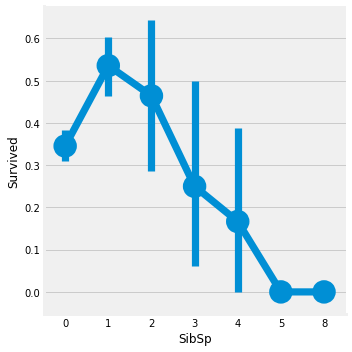

In [38]:
sns.factorplot('SibSp','Survived',data=train_data)

# Parch

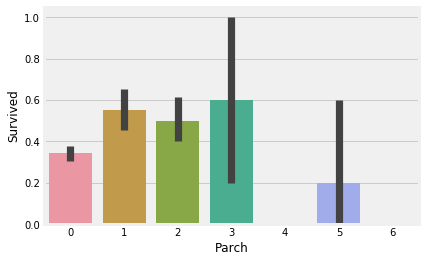

In [42]:
sns.barplot('Parch','Survived',data=train_data)

# Family size

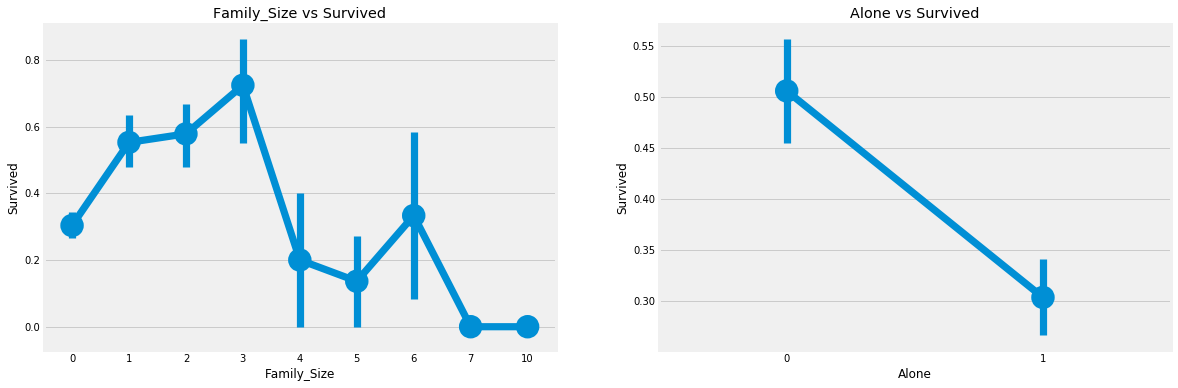

In [40]:
train_data['Family_Size']=0
train_data['Family_Size']=train_data['Parch']+train_data['SibSp']#family size
train_data['Alone']=0
train_data.loc[train_data.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=train_data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=train_data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

# Fare price

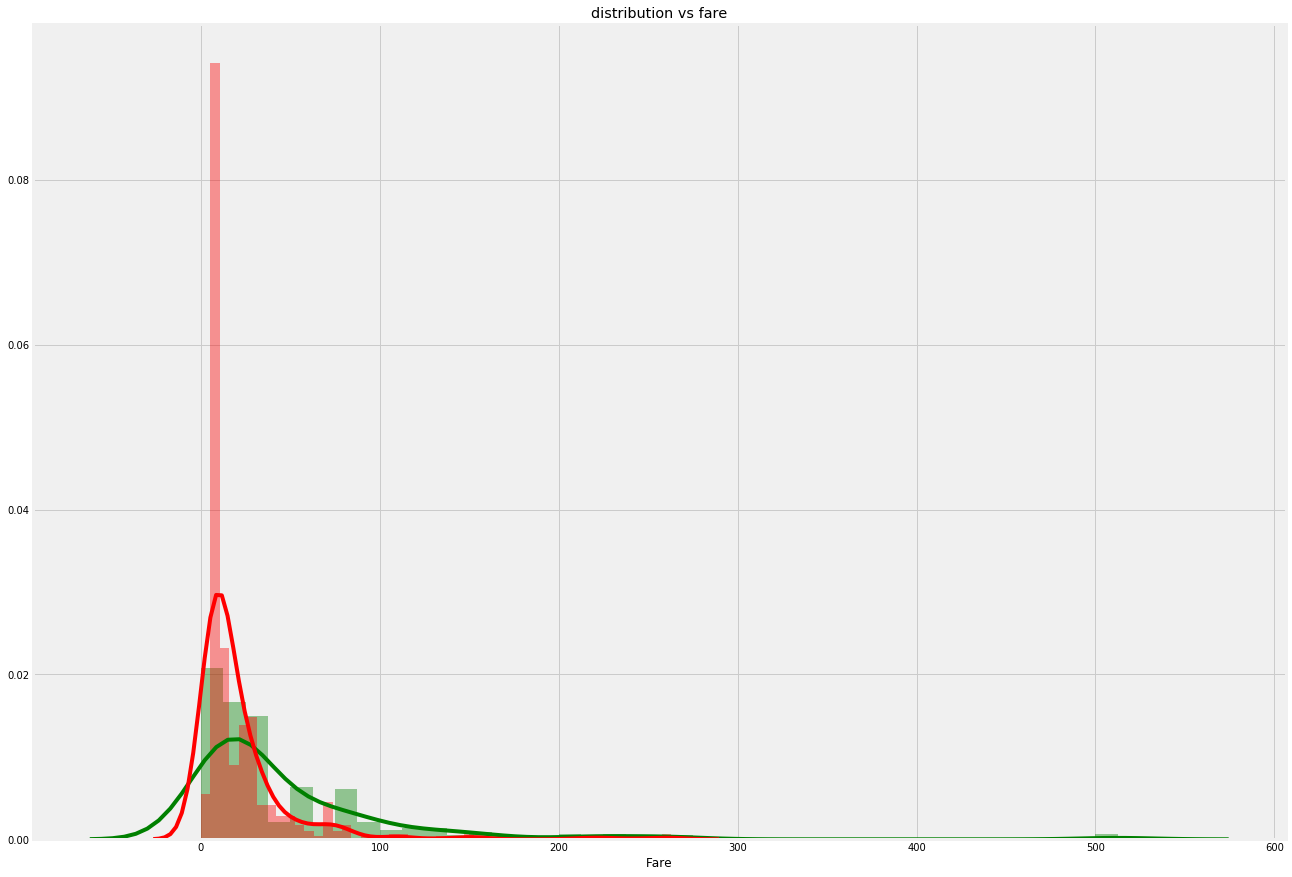

In [84]:
f =plt.figure(figsize=(20,15))
sns.distplot(train_data[train_data['Survived']==1].Fare, 
             color='green').set_title('distribution vs fare')
sns.distplot(train_data[train_data['Survived']==0].Fare, color='red')

We can see that higher fare prices tend to have a better survivabillity rate